<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

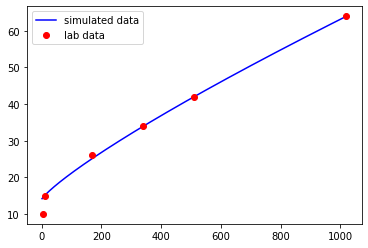

In [0]:
#H-B model fsolve
from scipy.optimize import fsolve
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
theta=np.array([64,42,34,26,15,10])
gamma=np.array([600,300,200,100,6,3])*1.7

def equations(p):
    x, y, z = p
    theta=np.array([64,42,34,26,15,10])
    gamma=np.array([600,300,200,100,6,3])*1.7

    theta_cp_n=np.array([theta[0],theta[1],theta[4]])
    gamma_s_n=np.array([gamma[0],gamma[1],gamma[4]])
    return (theta_cp_n[0]-x-y*(gamma_s_n[0])**z, 
            theta_cp_n[1]-x-y*(gamma_s_n[1])**z,
            theta_cp_n[2]-x-y*(gamma_s_n[2])**z)

tau0_HBc, K_HBc, n_HBc =  fsolve(equations, (0,1,1))

x=np.arange(1,601)*1.7
theta_HBc=tau0_HBc+K_HBc*(x)**n_HBc

plt.plot(x,theta_HBc,'b')
plt.plot(gamma,theta,'or')
plt.legend(['simulated data','lab data'])


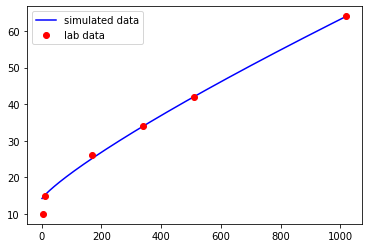

In [0]:
#H-B model bisection

def f(x,parameter):
    theta1=parameter[0][0];
    theta2=parameter[0][1];
    theta3=parameter[0][2];

    gamma1=parameter[1][0];
    gamma2=parameter[1][1];
    gamma3=parameter[1][2];

    y = theta1-theta3-(theta1-theta2)*(gamma1**x-gamma3**x)/(gamma1**x-gamma2**x)
    return y

def bisec(a,b,parameter):
    if f(a,parameter)*f(b,parameter)>0:
        print('Wrong choice');
        return None
    else:
        err=np.abs(a-b);
        while err>1e-7:
            p=(a+b)/2;
            if f(a,parameter)*f(p,parameter)<0:
                b=p;
            else:
                a=p;
            err=np.abs(a-b);
            
    return p


a=3
b=0.01

theta=np.array([64,42,34,26,15,10])
gamma=np.array([600,300,200,100,6,3])*1.7

theta_cp_n=np.array([theta[0],theta[1],theta[4]])
gamma_s_n=np.array([gamma[0],gamma[1],gamma[4]])
    
parameter=np.array([theta_cp_n,gamma_s_n])

n=bisec(a,b,parameter)
K = (theta[0]-theta[1])/(gamma[0]**n-gamma[1]**n)

theta_o = theta[2]-K*gamma[2]**n

x=np.arange(1,601)*1.7


theta_HBc=theta_o+K*(x)**n

plt.plot(x,theta_HBc,'b')
plt.plot(gamma,theta,'or')
plt.legend(['simulated data','lab data'])